In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [65]:
data = pd.read_csv("Zoo.csv")

In [85]:
#  Basic Information
print("Dataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nFirst 5 Rows:\n", data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Mis

***eda***

C:\Users\hp\AppData\Local\Temp\ipykernel_23800\4076463846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


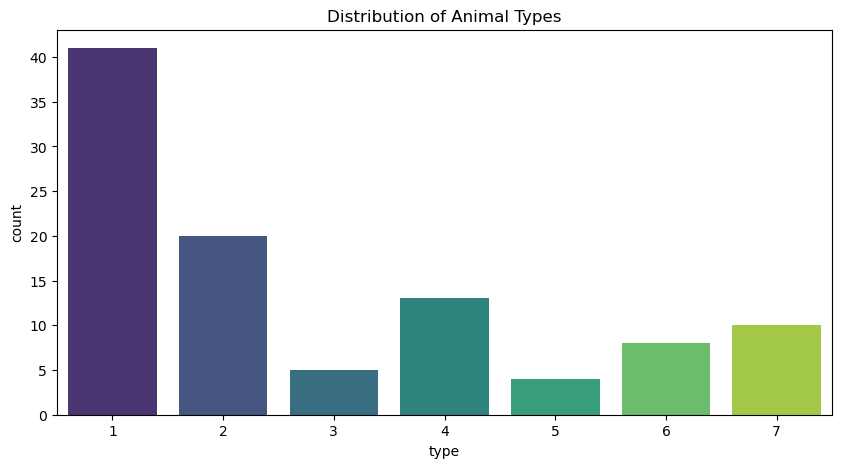

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=data, palette='viridis')
plt.title("Distribution of Animal Types")
plt.show()

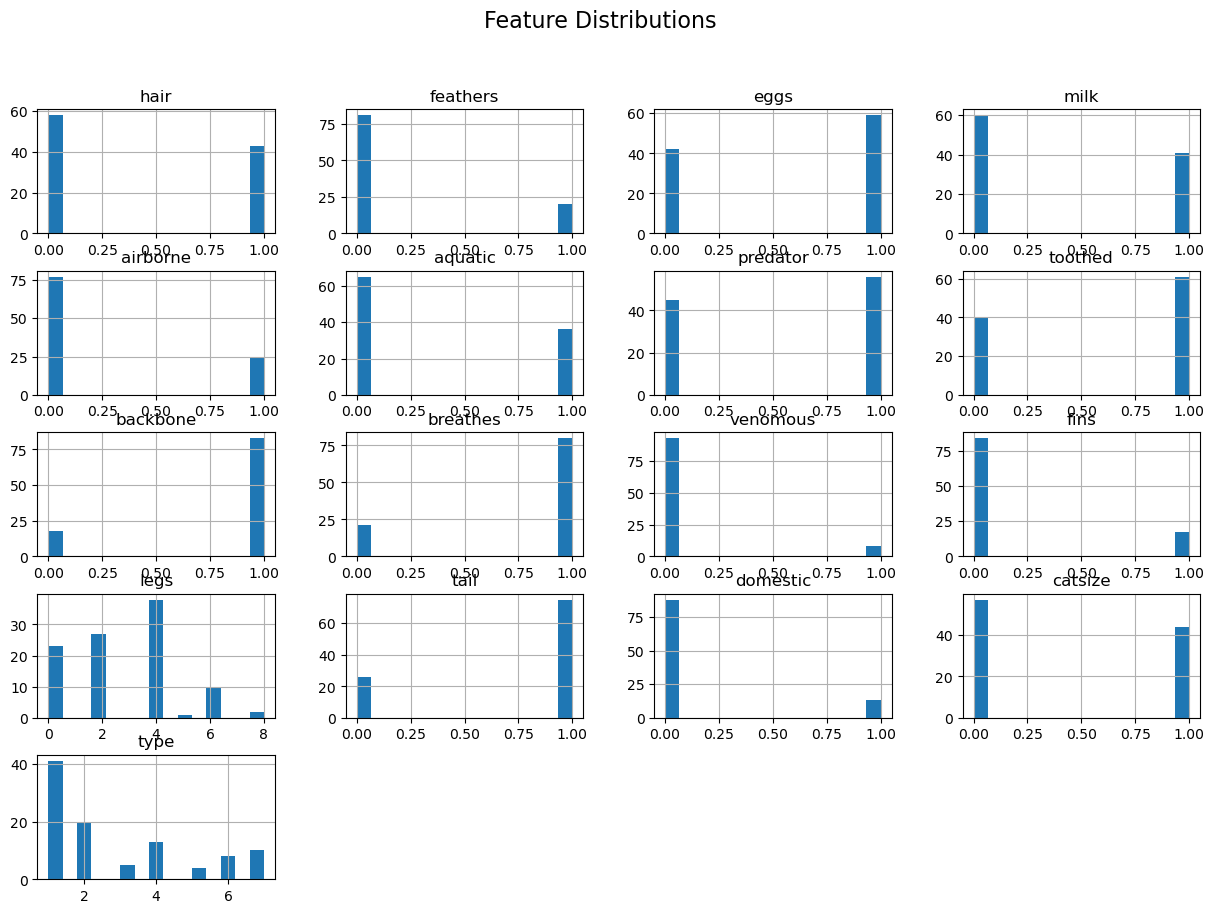

In [68]:
# Histograms
data.hist(figsize=(15, 10), bins=15)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

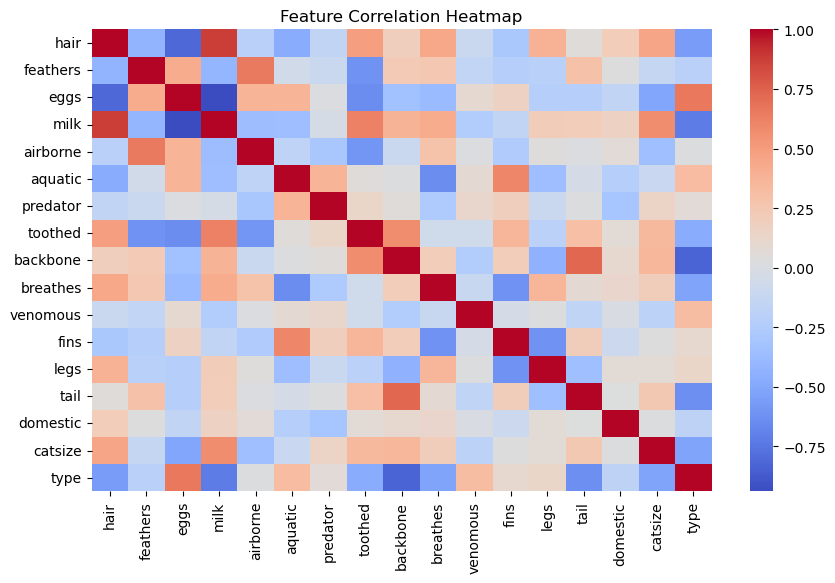

In [69]:
# Correlation Heatmap (numeric only to avoid string conversion errors)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

***data preprocessing***

We check for missing or inconsistent data using functions like isnull() and handle them appropriately.
Outliers are detected using boxplots or statistical methods (like IQR) and can be removed or capped.
Data cleaning ensures the model receives consistent, valid input for accurate results.

In [70]:
# Drop all non-numeric columns automatically
non_numeric = data.select_dtypes(include=['object']).columns
print("\nDropped non-numeric columns:", list(non_numeric))


Dropped non-numeric columns: ['animal name']


In [71]:

X = data.drop(columns=non_numeric)  # Keep only numeric columns
y = data['type']


In [72]:
# Drop target from X if accidentally included
if 'type' in X.columns:
    X = X.drop(columns=['type'])


***train split***

The cleaned dataset is divided into training (80%) and testing (20%) subsets using train_test_split.
Training data is used to fit the model, while test data evaluates performance on unseen samples.
This helps measure generalization and prevents overfitting.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

***feature scaling***

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**knn model***

In [75]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


We apply the KNN algorithm from sklearn.neighbors using the training data.
KNN classifies samples based on the majority class among the K nearest data points.
It is a simple, non-parametric, and effective method for classification tasks.

***evaluation***

In [76]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))



Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


***confusion matrix***

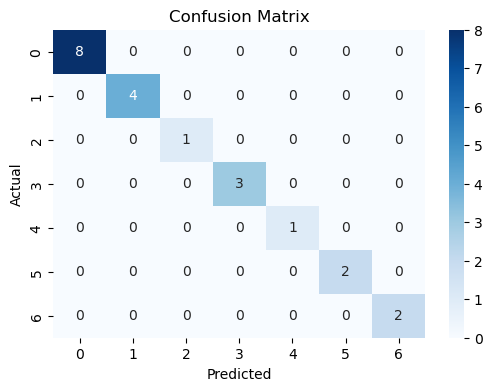

In [77]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:

# Step 10: Decision Boundary Visualization (using first two features)
X_vis = X_train_scaled[:, :2]  # First two features
y_vis = y_train

In [79]:
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)


KNeighborsClassifier()

In [83]:
from matplotlib.colors import ListedColormap


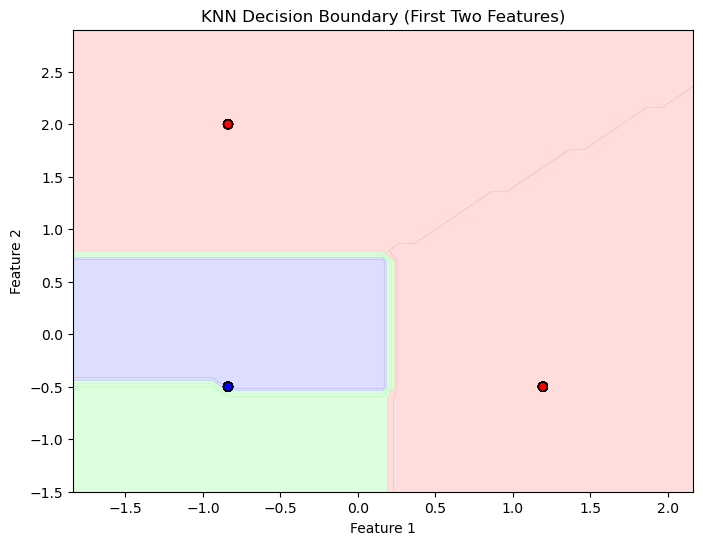

In [84]:
# Create grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=40, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title("KNN Decision Boundary (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

***QUE***

1. What are the key hyperparameters in KNN?

***n_neighbors (k)***Number of nearest neighbors to consider.

Small k → more complex model (risk of overfitting).

Large k → smoother model (risk of underfitting).

***weights –*** How neighbors influence prediction.

'uniform': all neighbors equal.

'distance': closer neighbors have higher influence.

***metric*** – Distance measure used (e.g., Euclidean, Manhattan, Minkowski).

***p***– Power parameter for Minkowski distance.

p=1 → Manhattan Distance

p=2 → Euclidean Distance

***algorithm***– Method for computing neighbors (auto, ball_tree, kd_tree, brute).

***leaf_size*** – Affects speed and memory in tree-based search (BallTree, KDTree)

2. What distance metrics can be used in KNN?

Euclidean Distance – Default metric; good for continuous data.

Manhattan Distance – Sum of absolute differences; good for grid-like data.

Minkowski Distance – General form (p=1 → Manhattan, p=2 → Euclidean).

Chebyshev Distance – Maximum coordinate difference between points.

Cosine Distance – Based on angle between vectors; used in text/similarity tasks.

Hamming Distance – For categorical or binary data.